# MBA FIAP Inteligência Artificial & Machine Learning

<p align="center">
<img src="imagens/smart-hiring.jpg">
</p>

## Tecnologia de Processamento de Imagens
## Projeto Final Smart-Hiring: Entrevista Virtual

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir uma aplicação que tem por objetivo analisar imagens e extrair uma série de informações que serão utilizadas para compor uma análise de seleção de candidatos para uma entrevista simulada.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Allan Gregory             | RM 330158      | `1IA` |
| Douglas Modesto             | RM 330217      | `1IA` |
| Jonas Prado             | RM 330323      | `1IA` |
| Liliane Scandoleiro             | RM 330672      | `1IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```## IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Detector de objeto (cartão de identificação)__
2. __Detector de faces__
3. __Detector de sorriso__
4. __Detector de bocejo__
5. __Detector de olhos fechados__
6. __Descritor de objetos na cena__
7. __Conclusões Finais__


## Introdução

_Disclaimer: as informações do caso de uso de negócio são meramente ilustrativas para aplicar as tecnologias de visão computacional de forma mais aderente ao desafio proposto. Todos os comentários foram forjados para dar vazão aos desafios e não representam formas de avaliação de candidatos. A empresa em questão, a Wandee, é fictícia._

A empresa **Wandee**, especializada em entrevistas virtuais, está construindo um produto minimamente viável (MVP) para testar algumas tecnologias voltadas a visão computacional para tornar o processo de seleção, especialmente a etapa de entrevista mais completo, rápido e que permita aos recrutadores obterem feedbacks mais completos além da profunidade técnica de cada posição, como por exemplo, se o candidato é ele mesmo (prova de identidade), se possuí o cartão de acesso a entrevista, aspectos de atenção durante a entrevista, como concentração e foco. Ainda será analisado questões de organização no local do entrevistado, buscando por objetos na visão da câmera.

Todo o processo de entrevista virtual é feito remotamente por meio de uma câmera (_webcam_). Logo, todos os algoritmos desenvolvidos precisam capturar as imagens desta origem.

## 1. Detector de objeto

Antes de começar com o processo de autenticação, os candidatos precisam utilizar o celular e exibir o ícone da empresa para a câmera. Se o resultado for positivo indica que o sistema pode avançar para a próxima etapa.

<p align="center">
<img src="imagens/logo.png" height="60%" width="60%">
</p>

Construa um algortimo que seja capaz de analisar uma região de interesse específica (ROI, _Region of Interest_), capturada por vídeo, e valide se o ícone está presente ao ser exibido pelo celular do candidato. 

Lembre-se que questões de proporção e rotação precisam ser consideradas na identificação.

Este processo precisa ser de rápida identificação, neste caso não será possível aplicar técnicas que envolvam aprendizado de máquina. É indicado o uso de detectores de objetos e extratores de características.

_No seu smartphone abra o navegador e entre com o link https://raw.githubusercontent.com/michelpf/fiap-ml-tec-proc-imagens-capstone/master/projeto-final/imagens/logo.png_

Ou, escaneie com seu smartphone o QRCode abaixo.

<p align="center">
<img src="imagens/qrcode.png" height="25%" width="25%">
</p>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import imutils
import collections
import time
import argparse
import dlib
from os import listdir
from os.path import isfile, join
from scipy.spatial import distance as dist
from imutils.video import VideoStream, FPS
from imutils import face_utils
from matplotlib.pyplot import figure
from threading import Thread


%matplotlib inline

A função abaixo deve receber uma imagem capturada da região de interesse e comparar com a imagem template do logotipo de empresa. O retorno é o número de correspondências encontradas.

In [2]:


def detector(image, template):
    # Conversão da imagem par escala de cinza
    image_search_gray = template #cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    
    FLANN_INDEX_LSH = 6
    index_params = dict(algorithm = FLANN_INDEX_LSH, table_number = 6, key_size = 12, multi_probe_level = 1) 
    search_params = dict(checks=100)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    image_target_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    orb_detector = cv2.ORB_create(5000)
    
    kps = orb_detector.detect(image_target_gray, None)
    kps_target, desc_target = orb_detector.compute(image_target_gray, kps)
   
    kps = orb_detector.detect(image_search_gray, None)
    kps_search, desc_search = orb_detector.compute(image_search_gray, kps)

    
    matches = flann.knnMatch(desc_target, desc_search, k=2)
        
    good_matches = []
    
    try:
        for (m,n) in matches:
            if m.distance < 0.8*n.distance:
                good_matches.append(m)
    except:
        pass
    
    return len(good_matches)


Carregue a imagem de template.

In [3]:
# IMPLEMENTAR
# Carregue a imagem do logotipo

image_template = cv2.imread("imagens/logo.png", 0) 

cv2.imshow("Image Target", image_template)
cv2.waitKey()
cv2.destroyAllWindows()

Utilize a função ```detector``` para obter as correspondências identificadas. Por meio de testes prévios, estabeleça qual o valor de _matches_ para o template definido. Isto pode fazer com que ajuste valores do detector ORB para ajustes, é um processo de experimentação.

Após definir o limiar, desenvolva uma regra para comparar com o valor de _matches_ e exibir em tempo real se o template foi localizado.

In [4]:
# Função de suporte para exibição de imagens no Jupyter

def exibir_imagem(image):
    cv2.imshow("Image Target", image)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [5]:
def salvar_imagem(image, nome):
    file = "imagens/"+ nome +".png"
    cv2.imwrite(file,image)
    

O trecho de códido abaixo é para iniciar a captura de imagens da câmera. Nela será definido uma região de interesse que deverá ser capturado uma imagem para acionar a função de detecção.

In [6]:
#cam_capture.release()

#Crindo a variável que irá realiar a leitura das imagens da web can
cam_capture = cv2.VideoCapture(0)

# Definindo região de interesse (ROI)
upper_left = (50, 50)
bottom_right = (300, 300)
image_capture = None

while True:
    
    # Obtendo imagem da câmera
    ret, image_frame = cam_capture.read()
    if ret:
    
        # Desenhar retângulo na região de interesse
        r = cv2.rectangle(image_frame, upper_left, bottom_right, (100, 50, 200), 5)
        
        # Obtendo região de interesse para validação do detector
        rect_img = image_frame[upper_left[1] : bottom_right[1], upper_left[0] : bottom_right[0]]
        
        # Executando o detector, definindo um limiar e fazendo a comparação para validar se o logotipo foi detectado
        # Implemntar
        matches = detector(rect_img, image_template)
    
        if matches > 20:
            cv2.putText(image_frame, "Identificado " + str(matches), (50,350), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 6)
            salvar_imagem(image_frame, "logotipo-detectado")
        cv2.imshow("Detector de Logotipo", image_frame)
        if cv2.waitKey(1) == 13:
            break
    else:
        break
        
        
cam_capture.release()
cv2.destroyAllWindows()

Armazene uma evidência do logotipo detectado, exibindo na imagem a região de interesse com a imagem.

In [7]:
# IMPLEMENTAR
# Passe o parâmetro localização da imagem para exibi-la no notebook

image = cv2.imread('imagens/logotipo-detectado.png')
if image is not None:
    exibir_imagem(image)
    

## 2. Detector de faces

Para validação de autenticidade do candidado, o processo de entrevista virtual precisa confirmar se a pessoa selecionada para a entrevista é a mesma. Neste caso a técnica a ser utilizada é por meio de um reconhecimento facial,

Inicialmente, precisamos treinar um classificador próprio do OpenCV com exemplos de imagem do candidato.
Eleja uma pessoa do grupo para ser o candidato e treine um conjunto de imagens suficiente para que seja possível alcançar similaridade, onde o valor de não similaridade seja de até 40 pontos. O algortimo de similaridade de faces utiliza um sistema que quando a face é idêntica, o número de pontos é igual a 0, se for totalmente diferente, tende ao infinito. Logo, patamar de 30 a 40 é um bom número de similaridade.

**Implementação**

Nesta etapa inicial será realizado o treinamento das faces de um determinado candidato.
Você precisará coletar um número de imagens relevante do candidato. Além disso, é recomendável aplicação de um detector de faces para que seja extraído somente a _região de interesse_ ou seja, a própria face. Uma maneira de conseguir este tipo de segmentação é utilizando um classificador em cascada de Haar treinado para este fim.

Utilize a função a abaixo para segmentar o rosto de uma imagem.

In [8]:
face_classifier = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')

# Extrator de faces
def face_extractor(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.2, 5)
    
    if faces is ():
        return None
    
    for (x,y,w,h) in faces:
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

In [9]:
def save_face(frame, contagem):
    contagem += 1
    face = cv2.resize(face_extractor(frame), (300, 300))
    face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

    file_name_path = 'imagens/faces/entrevistado/' + str(contagem) + '.jpg'
    cv2.imwrite(file_name_path, face)

    # Put count on images and display live count
    cv2.putText(face, str(contagem), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.imshow('Rosto Normalizado', face)
    return contagem

Crie um algoritmo para que treine um determinado número de faces, escolhido pelo grupo, par que seja armazenado em um diretório específico para posteior treinamento.

In [10]:
cam_capture.release()

cam_capture = cv2.VideoCapture(0)

# IMPLEMENTAR
# Defina o número máximo de imagens a serem coletadas

contagem_maxima = 100
contagem = 0

while True:
    ret, image_frame = cam_capture.read()
    
    if ret:
        cv2.imshow("Imagem de Treino", image_frame)
        
        if face_extractor(image_frame) is not None:
            contagem = save_face(image_frame, contagem)
            
        if cv2.waitKey(1) == 13 or contagem == contagem_maxima:
            break
        
cv2.destroyAllWindows()
print("Coleta de amostras completado")

Coleta de amostras completado


O treinamento utilizando é um próprio classificador de faces que o OpenCV possui. Neste caso vamos optar pelo classificador Local Binary Patterns Histograms (LBPH), que para este cenário é o mais adequado.

O grupo pode optar por escolher outros tipos de algoritmos do OpenCV, se desejarem.

In [11]:
# IMPLEMENTAR
# Defina o diretório utilizado para salvar as faces de exemplo

data_path =  'imagens/faces/entrevistado/'

onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]
training_data, labels = [], []

for i, files in enumerate(onlyfiles):
    image_path = data_path + onlyfiles[i]
    images = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    training_data.append(images)
    labels.append(0)

# Criando uma matriz da lista de labels
labels = np.asarray(labels, dtype=np.int32)

# Treinamento do modelo
model = cv2.face.LBPHFaceRecognizer_create()
model.train(training_data, labels)

print("Modelo treinado com sucesso.")

# IMPLEMENTAR
# Defina na chave 0 o nome do candidato

persons = {0: "Entrevistado"}

Modelo treinado com sucesso.


Vamos considerar uma classificação com sucesso quando a distândia de predição da face analisada for entre 30 e 40. Os valores de retorno destes classificador não é um índice de confiança.

Quando houver uma deteção dentro da margem de distância, armazene a imagem com o nome "success_candidate.png", constando as informações do nome do candidato e a distância identificada pelo classificador (retorno do método _predict_).

Escreva na tela onde a imagem da câmera é capturada a informação da distância de detecção da face extraída versus a face treinada, emuldure a face num retângulo e, se a face for devidadamente identificada, inclua um texto com a informação "```<Nome do candidato>``` Reconhecido"

In [12]:
face_classifier = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')

def face_detector(img):
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.1, 5)
    if faces is ():
        return img, [], 0, 0
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi, (200, 200))
    return img, roi, x, y

cam_capture.release()
cam_capture = cv2.VideoCapture(0)
image_capture = None

contagem = 101

while True:
    ret, frame = cam_capture.read()
    image_capture, face, x, y = face_detector(frame)
    
        # IMPLEMENTAR
        # Extraia a face da imagem obtida da câmera ***
        # Faça os ajustes necessários para classificá-la no classifcador treinado ***
        # Estabeleça um algoritmo para concluir se o resultado é 'Sucesso', candidato identificado ou 'Não Indetificado' para
        # quando não for localizado o candidato ***
        # Analise também situações onde a face não é identificada
        # Utilize a função face_extractor para segmentar a imagem de rosto
    
    try:
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        results = model.predict(face)
        
        #print(results)
        
        if x > 0:
            display_string = "Dist. " + str(int(results[1])) + ' ' + persons[results[0]] 
            cv2.putText(image_capture, display_string, (x, y-20), cv2.FONT_HERSHEY_DUPLEX, 1, (255,120,150), 2)

        if int(results[1]) >= 30 and int(results[1]) <= 40:
            cv2.putText(image_capture, "Douglas Reconhecido", (x, y-50), cv2.FONT_HERSHEY_DUPLEX, 1, (0,255,0), 2)
            cv2.imshow('Face Recognition', image_capture)
            salvar_imagem(image_capture, "face-detectadas")
        else:
            cv2.putText(image_capture, "Nao Indetificado", (250, 450), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
            cv2.imshow('Face Recognition', image_capture)

    except:
        cv2.putText(image_capture, "Rosto nao identificado", (220, 120) , cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
        cv2.putText(image_capture, "Nao reconhecido", (250, 450), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
        cv2.imshow('Face Recognition', image_capture )

    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cam_capture.release()
cv2.destroyAllWindows()     

Guarde como evidência de classificação bem sucedida, uma imagem capturada da câmera durante o processo.

In [13]:
# IMPLEMENTAR
# Passe o parâmetro localização da imagem para exibi-la no notebook
image = cv2.imread('imagens/face-detectadas.png')
if image is not None:
    exibir_imagem(image)

## 3. Detector de sorriso

Muitas empresas demandam que futuros empregados demonstrem educação, tranquilidade e empatia, características que podem ser evidencias com uma uma análise simples da receptividade do candidado por meio das expressões de seu rosto.

Um detector importante disto é sobre se o candidato mantém o semblante fechado ou se mantém um rosto alegre, oscilando sorrisos a medida que é realizada a entrevista e demais questionamentos.

Utilize as bibliotecas do _DLib_, em especial o preditor treinado para 68 pontos de marcação de face, para identificar a geometria dela e obtenha as marcações de interesse.

Uma das formas de extraírmos os pontos de contorno da face é utilizando o modelo do _DLib_ ```shape_predictor_68_face_landmarks.dat```. Este modelo retorna 68 pontos da face

In [14]:
predictor_68_path = "modelos/shape_predictor_68_face_landmarks.dat"
mouth_cascade = cv2.CascadeClassifier('classificadores/Mouth.xml')

predictor = dlib.shape_predictor(predictor_68_path)
detector = dlib.get_frontal_face_detector()

Liste os pontos de cada parte do rosto. A partir deles poderão ser feitos estudos geométricos para identificar características relcioandos aos mesmos.

In [15]:
# IMPLEMENTAR
# Para cada constante abaixo, indique uma lista de pontos dos 68 identificados pelo classificador do DLib
FACE_POINTS = [0, 68]
MOUTH_POINTS = [48, 68]
RIGHT_BROW_POINTS = [17, 22]
LEFT_BROW_POINTS = [22, 27]
RIGHT_EYE_POINTS = [36, 42]
LEFT_EYE_POINTS = [42, 48]
NOSE_POINTS = [27, 35]
JAW_POINTS = [0, 17]

Crie uma função que será utilizada para identificar um sorriso. Leve em consideração estudos que envolvem cálculo de razão de aspecto geométrico e adapte para os pontos dos lábios.

Estude o paper de [Soukupová e Čech de 2016](http://vision.fe.uni-lj.si/cvww2016/proceedings/papers/05.pdf) para entender como obter um cálculo de aspecto de razão para formas geométricas da face. Você pode fazer aproximações a partir do estudo do paper para outras formas, como os lábios e olhos.

Crie uma função ```month_aspect_ratio``` que receba os pontos dos lábios e calcule o aspecto de razão para que seja exibida dados de quando a boca está aberta, fechada, dentre outros comportamentos.

In [16]:
def month_aspect_ratio(mouth):
    A = dist.euclidean(mouth[3], mouth[9])
    B = dist.euclidean(mouth[2], mouth[10])
    C = dist.euclidean(mouth[4], mouth[8])
    avg = (A+B+C)/3
    D = dist.euclidean(mouth[0], mouth[6])
    mar=avg/D
    return mar


In [17]:

(mStart, mEnd) = face_utils.FACIAL_LANDMARKS_IDXS["mouth"]
    

Na função abaixo, inclua um segundo retorno que será a razão de aspecto dos lábios. Deixe como está o terceiro retorno, pois ele será estudado no próximo algoritmo.

In [18]:
def landmarks_Mouth(im):
    
    landmarks_list = []
    
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    
    clahe_image = clahe.apply(gray)
    
    rects = detector(clahe_image, 1)
    
    #for rect in rects:
    #    landmarks = numpy.matrix([[p.x, p.y] for p in predictor(im, rect).parts()])

    
    if len(rects) == 0:
        return im, 0, 0, 0
    
    
    for rect in rects:
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        pointsMouth= shape[mStart:mEnd]
        
        mouthHull = cv2.convexHull(pointsMouth)
        month_aspect = month_aspect_ratio(pointsMouth)
        eye_aspect = None

    return im, month_aspect, mouthHull, eye_aspect

Realize ensaios para definir o valor de sorriso versos simulações com os lábios normais e aberto. Um sorriso é uma estado entre os lábios fechados ou semi-fechados e a boca inteiramente aberta.
Definina abaixo os limiares inferior e superior para a identificação de um sorriso.

In [19]:
# IMPLEMENTAR
# Defina os valores mínimo e máximo para detecção do sorriso

sorriso_minimo = .45
sorrimo_maximo = .60

Após identificar o sorriso, contabilize quantas vezes foram identificados.

In [20]:

cam_capture.release()
    
cam_capture = cv2.VideoCapture(0)
cv2.destroyAllWindows()

# Quantidade de sorrisos identificados
qtde_sorrisos = 0
TOTAL = 0
image_capture = None

print("[INFO] starting video stream thread...")
vs = VideoStream(src=0).start()
fileStream = False
time.sleep(1.0)

fps= FPS().start()

while True:
    ret, image_frame = cam_capture.read()
    prev_sorriso = sorriso = 2 
    
    image_frame = cv2.flip(image_frame,180) 
    
    if ret:
        image_frame, month_aspect, mouthHull, _ =  landmarks_Mouth(image_frame)
        
        # IMPLEMENTAR
        # Defina o algoritmo que irá identificar o sorriso baseado nos limites defindos
        # Crie uma lógica para contar quantas vezes o sorriso foi dado
    
        if month_aspect > sorriso_minimo and month_aspect < sorrimo_maximo:
            cv2.drawContours(image_frame, [mouthHull+1], -1, (0, 255, 0), 1)
            qtde_sorrisos += 1
            salvar_imagem(image_frame, "sorriso-detectado")

        cv2.putText(image_frame, "MAR: {}".format(month_aspect), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        cv2.putText(image_frame, "{} Sorrisos detectados".format(qtde_sorrisos), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        cv2.imshow("Detector de Sorriso", image_frame)
        fps.update()
    
        
        # Se for teclado Enter (tecla 13) deverá sair do loop e encerrar a captura de imagem   
        if cv2.waitKey(1) == 13:
            break
    else:
        break

fps.stop()

cam_capture.release()
cv2.destroyAllWindows()

[INFO] starting video stream thread...


Armazene um exemplo de uma imagem, na pasta ```imagens``` com o sorriso detectado para exibição.

In [21]:
# IMPLEMENTAR
# Passe o parâmetro localização da imagem para exibi-la no notebook

image = cv2.imread('imagens/sorriso-detectado.png')
if image is not None:
    exibir_imagem(image)

## 4. Detector de bocejos

Os candidados devem estar sempre atentos durante a entrevista virtual. Para garantir que ele se preparou adequadamente antes do início da entrevista não deverá ser tolerado bocejos.

Um detector de bocejos deverá utilizar aspectos das marcações dos lábios já definidas para identificar o bocejo. Neste caso o que será diferente é o valor da razão de aspecto.

Neste caso não há um limiar, como o bocejo é a boca aberta ao máximo, vamos definir um valor mínimo.

In [22]:
def landmarks_Yawn(im):
    
    landmarks_list = []
    
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    
    clahe_image = clahe.apply(gray)
    
    rects = detector(clahe_image, 1)
    
    #for rect in rects:
    #    landmarks = numpy.matrix([[p.x, p.y] for p in predictor(im, rect).parts()])

    
    if len(rects) == 0:
        return im, 0, 0, 0
    
    
    for rect in rects:
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        pointsMouth= shape[mStart:mEnd]
        
        mouthHull = cv2.convexHull(pointsMouth)
        month_aspect = month_aspect_ratio(pointsMouth)
        eye_aspect = None

    return im, month_aspect, mouthHull, eye_aspect

In [23]:
# IMPLEMENTAR
# Defina o valor mínimo de abertura dso lábios

bocejo_minimo = .50

In [24]:
cam_capture.release()
    
cam_capture = cv2.VideoCapture(0)
cv2.destroyAllWindows()

# Quantidade de bocejos identificados
qtde_bocejos = 0
TOTAL = 0
image_capture = None

print("[INFO] starting video stream thread...")
vs = VideoStream(src=0).start()
fileStream = False
time.sleep(1.0)

fps= FPS().start()


while True:
    ret, image_frame = cam_capture.read()
    #prev_bocejo = bocejo 
    
    if ret:
        image_frame, month_aspect, mouthHull, _ =  landmarks_Yawn(image_frame)
        
        # IMPLEMENTAR
        # Defina o algoritmo que irá identificar o bocejo baseado no limite defindo
        # Crie uma lógica para contar quantas vezes o bocejo foi dado
        
        if month_aspect > bocejo_minimo:
            cv2.drawContours(image_frame, [mouthHull+3], -3, (255, 0, 0), 2)
            qtde_bocejos += 1
            salvar_imagem(image_frame, "bocejo-detectado")

        cv2.putText(image_frame, "MAR: {}".format(month_aspect), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        cv2.putText(image_frame, "{} Bocejos detectados".format(qtde_bocejos), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        cv2.imshow("Detector de Bocejos", image_frame)
        
        fps.update()
    
        
       
        # Se for teclado Enter (tecla 13) deverá sair do loop e encerrar a captura de imagem   
        if cv2.waitKey(1) == 13:
            break
    else:
        break
        
cam_capture.release()
cv2.destroyAllWindows()

[INFO] starting video stream thread...


Armazene um exemplo de uma imagem, na pasta ```imagens``` com o bocejo detectado para exibição.

In [25]:
# IMPLEMENTAR
# Passe o parâmetro localização da imagem para exibi-la no notebook
image = cv2.imread('imagens/bocejo-detectado.png')
if image is not None:
    exibir_imagem(image)

## 5. Detector de olhos fechados

A atenção durante um processo de entrevista é algo crucial, e mais marcante neste etapa do processo seletivo. Por esta razão é preciso identificar a quantidade de vezes que o entrevistado feche os olhos, para entendermos se ele de fato está atento as perguntas e ao processo como um todo.

Elabore um algoritmo que detecte os olhos fechados e contabilize ao final da transmissão.

Este caso requer um estudo também geométrico que visa analisar os pontos da marcação dos olhos. Para fins de simplificação, podemos adotar um único olho, e a partir dele, estebelecer o razão de aspecto para quando ele está aberto e fechado.

Construa uma função chamada ```eye_aspect_ratio``` para calcular o aspecto de razão de um dos olhos.

In [26]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils.video import VideoStream
from imutils import face_utils
from threading import Thread
import numpy as np
import argparse
import imutils
import time
import dlib
import cv2

In [27]:
def landmarks_eyes(im):
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 
    # detector de faces no grayscale frame
    rects = detector(gray, 0)
    # loop over the face detections
    ear = 0
    leftEyeHull = 0
    rightEyeHull = 0
    for rect in rects:
        # determine os marcos faciais para a região da face e, em seguida,
        # converta o ponto de referência facial (x, y) -coordena para um NumPy        
        # array
        
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        
        # extrair as coordenadas do olho esquerdo e direito, depois use as
        # coordenadas para calcular a proporção do olho para ambos os olhos
        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)
 
        # média a proporção do olho em conjunto para ambos os olhos
        ear = (leftEAR + rightEAR) / 2.0
        
        # calcular o casco convexo para o olho esquerdo e direito, então
        # visualize cada um dos olhos
        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(im, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(im, [rightEyeHull], -1, (0, 255, 0), 1)
        
        if ear is None:
            ear = 0
            
        if leftEyeHull is None:
            leftEyeHull = 0
        
        if rightEyeHull is None:
            rightEyeHull = 0
        
        
    return im, ear, leftEyeHull, rightEyeHull

In [28]:
def eye_aspect_ratio(eye):
    
    # IMPLEMENTAR
    # Calcule o EAR (Eye Aspect Ratio) que determina o aspecto de razão da geometria de um dos olhos
        # compute the euclidean distances between the two sets of
    # vertical eye landmarks (x, y)-coordinates
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
 
    # compute the euclidean distance between the horizontal
    # eye landmark (x, y)-coordinates
    C = dist.euclidean(eye[0], eye[3])

    # compute the eye aspect ratio
    ear = (A + B) / (2.0 * C)
 
    # return the eye aspect ratio
    return ear

Altere a função ```annotate_landmarks_convex_hull_image``` para exibir, no terceiro parâmetro o valor de aspecto de um dos olhos.

No caso do olho, precisamos definir somente um valor máximo de limite.

In [29]:
# IMPLEMENTAR
# Defina um valor máximo para determinar se o olho está fechado
olho_maximo = None
OLHO_MAXIMO = 0.25
EYE_AR_THRESH = 0.25
EYE_AR_CONSEC_FRAMES = 7

olhosFechadosQtde = 0

# initialize the frame counter as well as a boolean used to
# indicate if the alarm is going off
CONTADOR = 0


# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
print("[INFO] loading facial landmark predictor...")
detector = dlib.get_frontal_face_detector()
predictor_68_path = "modelos/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(predictor_68_path)


# grab the indexes of the facial landmarks for the left and
# right eye, respectively
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

[INFO] loading facial landmark predictor...


In [30]:
# start the video stream thread
print("[INFO] starting video stream thread...")
cap = cv2.VideoCapture(0)
vs = VideoStream(0).start()
time.sleep(1.0)
 
# loop sobre os frames do video stream
while True:
    # pegue o frame dos arquivos de vídeo encadeados, redimensione
    #, e convertê-los em escala de cinza
    ret, image_frame = cap.read()
    
    image_frame, ear, leftEyeHull, rightEyeHull = landmarks_eyes(image_frame)
    fechou = False;

    # IMPLEMENTAR
    # Defina o algoritmo que irá identificar se um olho está fechado baseado no limite defindo
    # Crie uma lógica para contar quantas vezes o olho foi fechado
    if  ear> 0 and ear < OLHO_MAXIMO:
        CONTADOR += 1
        # se os olhos estiverem fechados por um número suficiente de frames salvamos a imagem.
        if CONTADOR >= EYE_AR_CONSEC_FRAMES:
            # draw an alarm on the frame
            cv2.putText(image_frame, "Cochilando", (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            salvar_imagem(image_frame, "olhos-fechados-detectado")
            fechou = True
        # caso contrário, a proporção do olho não está abaixo do piscar de olhos
        # limiar, então redefinir o contador e alarme
    else:
        CONTADOR = 0
            
    
    if  fechou == True:           
        olhosFechadosQtde += 1
        fechou = False
 
    
    # desenhe a relação de aspecto do olho computado no quadro para ajudar
    # com depuração e definição da proporção correta do olho
    # limiares e contadores de quadros
    cv2.putText(image_frame, "EAR: {:.2f}".format(ear), (500, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
    cv2.putText(image_frame, "Vezes de olhos fechados: {:.2f}".format(olhosFechadosQtde), (10, 60),
        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

            
    cv2.imshow("Detector de Olhos Fechados", image_frame)
        
    # Se for teclado Enter (tecla 13) deverá sair do loop e encerrar a captura de imagem  
    if cv2.waitKey(1) == 13:
        break
cv2.destroyAllWindows()
vs.stop()
    

[INFO] starting video stream thread...


In [31]:
image = cv2.imread('imagens/olhos-fechados-detectado.png')
if image is not None:
    exibir_imagem(image)

## 6. Descritor de objetos na cena

A organização do local na casa do entrevistado é um item relevante, pois a partir destes detalhes é possível traçar alguns tipos de perfis que são essenciais para certas posições nas empresas.

Desta forma precisamos construir um algoritmo que realize uma inspeção de objetos na área da câmera que é utilizada para fazer a entrevista. Ao final mostre quais e quantos objetos foram detectados.

É necessário baixar os pesos (modelo de deep-learning) neste link https://pjreddie.com/media/files/yolov3.weights e copiar para  pasta weights.

In [32]:
import torch

torch.cuda.is_available()

False

In [33]:
from utils import *
from darknet import Darknet

# Configurações na rede neural YOLOv3
cfg_file = 'cfg/yolov3.cfg'
m = Darknet(cfg_file)

# Pesos pré-treinados
weight_file = 'data/yolov3.weights'
m.load_weights(weight_file)

# Rótulos de classes
namesfile = 'data/coco.names'
class_names = load_class_names(namesfile)

Ajuste os valores de NMS (_Non-Maximum Supression_) para regular a sensibilidade de imagens com baixa luminosidade e IOU (_Intersect of Union_) que definie o indicador se o retângulo de identificação de imagem foi adequadamente desenhado.

In [34]:
# IMPLEMENTAR
# Definia apropriadamente os valores de limiar de NMS e IOU

nms_thresh = 0.4
iou_thresh = 0.5

Separe um imagem que será analisada pelo classificador, após teclar o _Enter_. Armazene no diretório ```imagens/local-entrevista.png```.

In [35]:
cam_capture = cv2.VideoCapture(0)
image_capture = None
while True:
    ret, image_frame = cam_capture.read()
    if ret:
        cv2.imshow("Inspecao Local", image_frame)
        
        
        
        # IMPLEMENTAR
        # Após teclar enter, armazene uma imagem para posterior análise
        if cv2.waitKey(1) == 13:
            salvar_imagem(image_frame, "local-entrevista")
            image_capture = image_frame
            break
        
        
cam_capture.release()
cv2.destroyAllWindows()

A imagem a ser analisada.

In [36]:
# IMPLEMENTAR
# Altere abaixo o parâmetro de entrada para o caminho onde a imagem foi armazenada
image = cv2.imread('imagens/local-entrevista.png')
if image is not None:
    exibir_imagem(image)

    Os passos abaixo são para configuração da imagem no padrão que o classificador foi treinado.

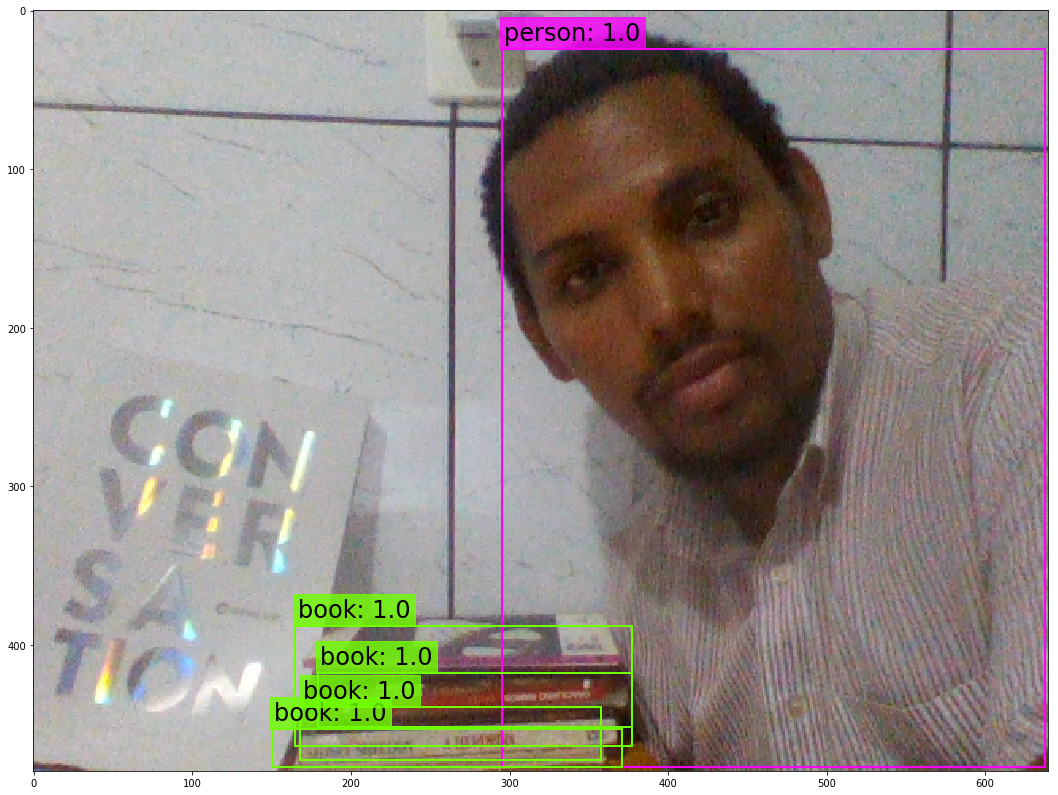

In [37]:
# Definindo tamnaho do gráfico
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Carregar imagem para classificação
img = cv2.imread('imagens/local-entrevista.png')

# Conversão para o espaço RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Redimensionamento para adatapção da primeira camada da rede neural 
resized_image = cv2.resize(original_image, (m.width, m.height))

# Deteteção de objetos na imagem
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Desenho no gráfico com os regângulos e rótulos
plot_boxes(original_image, boxes, class_names, plot_labels = True)

Obtenha os objetos identificados a partir da função ```list_objects(boxes, class_names)```. Será retornardo uma lista de objetos que deverá ser analisado para contar a quantidade de cada objeto. Se houver mais de um item igual, por exemplo _tvmonitor_ ele aparecerá duplicado na imagem.

In [38]:
# IMPLEMENTAR
# Conte os objetos identificados pelo classificador, de forma que seja exibido 
# objeto 1, quantidade 1
# objeto 2, quantidade 1
# ...

objetos = list_objects(boxes, class_names)

objetosAux = set(objetos)
for objeto in objetosAux:
    print('Objeto ' + str(objeto) + ', Quantidade ' + str(objetos.count(objeto)))



Objeto person, Quantidade 1
Objeto book, Quantidade 4


## Conclusões finais

**Pergunta:** Diante de todos os desafios propostos (1 ao 6) e soluções encontradas, quais seriam os próximos passos de forma a tornar mais precisos cada atividade, levando em consideração: (1) restrições de processamento em tempo real, (2) sem restrições de processamento em tempo real?

**Resposta**:

No primeiro desafio sobre Detector de objetos, para melhorar sua precisão poderíamos utilizar conjuntos de características heterogêneas, compostas por características que apontam diferentes informações inclusas na imagem. As características mais utilizadas são: Haar Like, Color Self-Similary, Local Binary Pattern e Histogram of Oriented Gradients. Geralmente, essas características são utilizadas em conjunto para aumentar a precisão do detector. Poderíamos também utilizar a correspondência de formas ou shaping matching que é uma técnica de identificação da forma de um objeto alvo e depois comparar com outros objetos. Os objetos nem sempre são idênticos porém necessitam ter similaridades geométricas. Há também a correspondência de características, onde podemos buscar em outras imagens as mesmas características, ainda que sejam ligeiramente diferentes. Há duas formas no OpenCV que utilizam este tipo de busca:FLANN (Fast Library for Approximate Nearest Neighbors) e a Força Bruta. O força bruta, mesmo com  imagens diferentes e em condições também diferentes como escala e rotação é possível encontrar os mesmos descritores em ambas as imagens, utilizamos esta abordagem.

O segundo desafio referente à detecção de faces podemos esbarrar em alguns problemas como por exemplo: Pose, Expressão facial, presença de elementos estruturais como barbas, bigóde, óculos e esses elementos podem mudar a característica da face. Para melhorar nossa abordagem com o intuito de aumentar a precisão no reconhecimento de faces, podemos utilizar alguns métodos, por exemplo, estamos utilizando em nosso desafio o método baseado em conhecimento, que representa a técnica de detecção de faces que utilizam alguma base de regras estabelecidas a partir do conhecimento prévio sobre o que é uma face. Em alguma situações é necessário realizar transformações sobre a imagem. Estamos utilizando o classificador Local Binary Pattern Histgram (LBPH), que utiliza parâmetro locais preservando relações espaciais. Poderimos testar com mais dois classificadores que são Eingenfaces que utiliza o PCA (Principal Component Analysis) para redução de dimensionalidade e Fisherfaces que também aplica redução de dimensonalidade com o LDA (Linear Discriminant Analysis), que tem o objetivo de minimizar variações na própria classe e maximizar entre as classes.

O terceiro desafio trata de reconhecimento de regiões da face, é um classificador que tende a ser um pouco demorado e não é muito indicado para processamento em tempo real. Para não ficar tão lento focamos apenas nos lábios para poder identificar os sorrisos, utilizamos o classificador haar cascade para isso. Haar features são bons em detectar bordas e linhas. Isso faz com seja eficaz na detecção de rostos e seus detalhes. Porém os recursos de haar precisam ser determinados manualmente e isso faz com que haja um certo limite de detecção, e devido a isso, um classificador baseado em Haar pode não ser capaz de reconhecer uma face. No entanto se o Haar não atendesse nossas expectativas, poderiamos utilizar um Kernel convolucional, que tem um grau mais alto de liberdade e tem a capacidade de reconhecer rostos parcialmente cobertos; Poderiamos utilizar também uma outra técnica baseada em HOG (Hisogram of Oriented Gradients), onde se busca identificação voltada a borda.

O quarto desafio é muito semelhante ao terceiro, onde neste, precisamos identificar se o candidato está bocejando, portanto utilizamos a mesma implementação utilizada na detecção de sorrisos, onde só precisamos configurar o valor mínimo para o bocejo levando em consideração que o bocejo é a boca aberta ao máximo.

Para o quinto desafio referente à detecção de olhos fechados, utilizamos o mesmo método utilizado nos desafios acima para identificar nossa zona de interesse na face, porém para melhorar o desempenho em questão de poder de processamento, poderíamos utilizar o classificador de 5 pontos que uma forma mais rápida de identificar rostos com uma boa precisão. Uma particularidade da detecção de olhos fechados é que foi necessário calcular o EAR (Eye Aspect Ratio) que determina o aspecto de razão da geometria dos olhos.

No sexto desafio, na identificação de objetos na cena, utilizamos um dos classificadores mais robustos que não apresenta apenas qualidade na detecção, mas também velocidade, o YOLO (You Only Look Once), com viés para aplicações em tempo real. O YOLO divide a imagem em partes pequenas onde são identificadas por uma janela móvel conhecida como convolução. Essas pequenas partes vão se agrupando para discriminar um objeto de outro, as informações que não ativam nenhum outro rótulo são descartadas. Poderíamos utilizar como alternativa a "Detecção de objetos Integrada à segmentação semântica - Detectron". O Detectron é o sistema da divisão de Pesquisa & Desenvolvimento em Inteligência Artificial do Facebook que implementa algoritmos para detecção de objetos.
